In [1]:
import numpy as np 
import pandas as pd 
import os
from ast import literal_eval
import matplotlib.pyplot as plt

In [2]:
credits = pd.read_csv('/kaggle/input/the-movies-dataset/credits.csv')
keywords = pd.read_csv('/kaggle/input/the-movies-dataset/keywords.csv')
links_small = pd.read_csv('/kaggle/input/the-movies-dataset/links_small.csv')
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')

movies = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv')
movies = movies.drop([19730, 29503, 35587])
movies['id'] = movies['id'].astype('int')
movies['genres'] = movies['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
movies['description'] = movies['overview']
movies['description'] = movies['description'].fillna('')

ratings = pd.read_csv('/kaggle/input/the-movies-dataset/ratings.csv')
#movies = movies[movies['id'].isin(links_small)]

/tmp/ipykernel_31/3098985085.py:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv')


In [3]:
len(ratings)

26024289

In [4]:
columns_take = ['genres', 'id', 'title', 'description']
all_columns = movies.columns
columns_drop = [column for column in all_columns if column not in columns_take]
movies = movies.drop(columns=columns_drop)

movies.to_csv('/kaggle/working/movies.csv')

In [5]:
movie_ids_in_ratings = ratings['movieId'].unique()
print(f"Number of movie IDs in ratings dataframe: {len(movie_ids_in_ratings)}")
movie_ids_in_movies = movies['id'].unique()
print(f"Number of movie IDs in movies dataframe: {len(movie_ids_in_movies)}")

missing_ids_ratings = [movie_id for movie_id in movie_ids_in_ratings 
                     if movie_id not in movie_ids_in_movies]
missing_ids_movies = [movie_id for movie_id in movie_ids_in_movies 
                     if movie_id not in movie_ids_in_ratings]

print(f"Number of movie IDs present in ratings but missing from movies: {len(missing_ids_ratings)}")
print(f"Percentage of missing movies: {len(missing_ids_ratings) / len(movie_ids_in_ratings) * 100:.2f}%")

print(f"Number of movie IDs present in movies but missing from ratings: {len(missing_ids_movies)}")
print(f"Percentage of missing movies: {len(missing_ids_movies) / len(movie_ids_in_movies) * 100:.2f}%")
# Ensure consistent types
movies['id'] = movies['id'].astype(int)
ratings['movieId'] = ratings['movieId'].astype(int)

valid_movie_ids = set(movies['id'])  # Convert to set for fast lookup
ratings = ratings[ratings['movieId'].isin(valid_movie_ids)]

print(f"New number of rows in ratings after removing invalid movie IDs: {len(ratings)}")

Number of movie IDs in ratings dataframe: 45115
Number of movie IDs in movies dataframe: 45433
Number of movie IDs present in ratings but missing from movies: 37550
Percentage of missing movies: 83.23%
Number of movie IDs present in movies but missing from ratings: 37868
Percentage of missing movies: 83.35%
New number of rows in ratings after removing invalid movie IDs: 11436568


In [6]:
ratings.drop(columns=['timestamp'], inplace=True)
ratings.to_csv('/kaggle/working/ratings.csv')

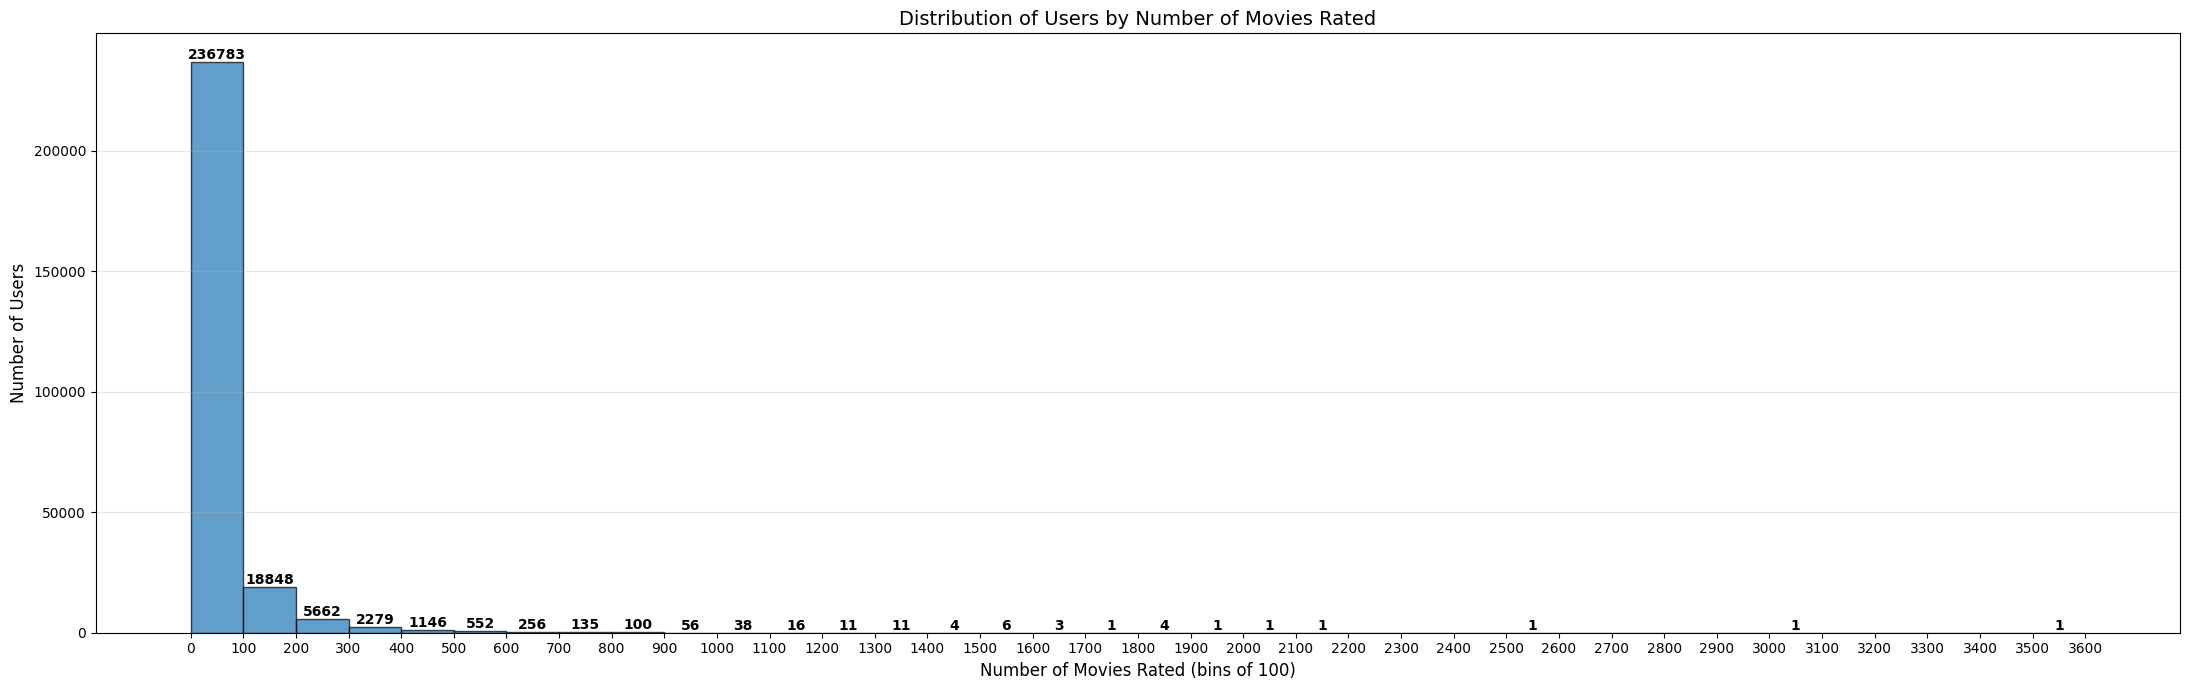

In [7]:
df = ratings
user_rating_counts = df.groupby('userId').size().reset_index(name='movies_rated')
max_movies = user_rating_counts['movies_rated'].max()
bins = np.arange(0, max_movies + 101, 100)

plt.figure(figsize=(22, 7))

counts, edges, patches = plt.hist(user_rating_counts['movies_rated'], bins=bins, 
                                  edgecolor='black', alpha=0.7)

for i in range(len(counts)):
    if counts[i] > 0:  
        plt.text(edges[i] + (edges[i+1] - edges[i])/2, counts[i], 
                 f'{int(counts[i])}', 
                 ha='center', va='bottom', fontweight='bold')

plt.xlabel('Number of Movies Rated (bins of 100)', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.title('Distribution of Users by Number of Movies Rated', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.xticks(bins)
plt.tight_layout()
plt.show()
